## Implicit Object  
We will begin to understand how implicit representations are related to physical object (Geometric Objects).

Let $\space (x_1, x_2, ..., x_d) \in \R^{d}$ and denote $\ p = (x_1, x_2, ..., x_d)$  
A generic iso-surface is defined by $f(p) = 0$
A perticular case of this is when $f(p)$ is a polynomial function then the implicit function is known as an $Algebraic\ surface$.
In perticular a polynomial surface of degree 2 is known as a $Quadric$.

For example in 3D: $Ax^2 + Bxy + Cxz + Dy^2 + Eyz + Fz^2 + Gx + Hy + Iz + J = 0$ is a $Quadric$ where the coefficient define the type of the surface.
NOTE: the highest summation of exponent per term is 2

In our running example a sphere is also a $Quadric$ of the form: $(x - x_0)^2 + (y - y_0)^2 + (z - z_0)^2 - r^2 = 0$

### A Sphere from general Quadric

$x^2 -(2x_0)x + x_0^2 + y^2 -(2y_0)y + y_0^2 + z^2 -(2z_0)z + z_0^2 - r^2 = 0$  
$Ax^2 + Bxy + Cxz + Dy^2 + Eyz + Fz^2 + Gx + Hy + Iz + J = 0$  
$A = 1$ (coefficient of $x^2$)  
$B = 1$ (coefficient of $y^2$)  
$C = 1$ (coefficient of $z^2$)  
$D = 0$ (coefficient of $xy$)  
$E = 0$ (coefficient of $xz$)  
$F = 0$ (coefficient of $yz$)  
$G = -2x_0$ (coefficient of $x$)  
$H = -2y_0$ (coefficient of $y$)  
$I = -2z_0$ (coefficient of $z$)  
$J = x_0^2 + y_0^2 + z_0^2 - r^2$ (constant term)


### Vector Projections

Consider a line on a 2D plane and a point $p_0 = (x_0, y_0)$ on the line, the vector from $p_0$ to any other point $p = (x - x_0, y - y_0)$ on the line is $p-p_0$.  

If we now consider the point $n = (n_x, n_y)$ perpendicular to $p_0$. This vector is normal to every vector of the line, as such the dot product will be zero.

This means that $n•(p-p_0) = 0$ must be satisfied. If we expand this we obtain: $$\begin{bmatrix}n_x \\ n_y\end{bmatrix}•\begin{bmatrix}x - x_0 \\ y - y_0\end{bmatrix} = n_x(x - x_0) + n_y(y - y_0) = n_xx + n_yy + (-n_xx_0 - n_y y_0)=0$$  
which is the implicit equation of a 2D line $$ax + by + c = 0$$

Now consider $((0,0)-p_0) = (-x_0, -y_0)$, the length of this vector is the distance from $p_0$ to the origin.

To obtain the distance of the line to the origin we need to project the vector to the origin:
$$ n • ((0,0)-p_0) = c => -n_xx_0 -n_yy_0 - c = 0$$

so for any $a'x + b'y + c = 0$ divide coefficients $a = \frac{a'}{\sqrt{a'^2 + b'^2}} \ b = \frac{b'}{\sqrt{a'^2 + b'^2}} \ c = \frac{c'}{\sqrt{a'^2 + b'^2}}$ then $(a,b)$ will represent the normal vector to the line from the origin and c is the distance to the origin.

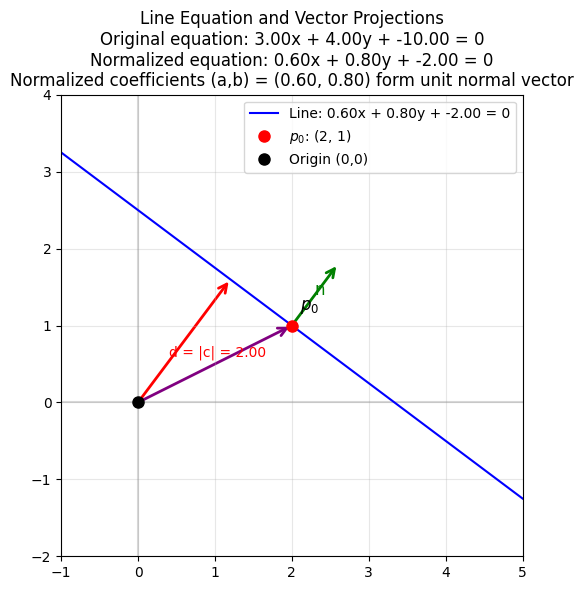

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import FancyArrowPatch

# Create a simpler figure
fig, ax = plt.subplots(figsize=(8, 6))

# Define line with a point p0 and normal vector n
p0 = np.array([2, 1])         # A point on the line
n = np.array([3, 4])          # Normal vector (not normalized yet)

# Calculate line coefficients (ax + by + c = 0)
a_prime, b_prime = n
c_prime = -(a_prime*p0[0] + b_prime*p0[1])  # Solve for c using p0

# Normalize coefficients
norm_factor = np.sqrt(a_prime**2 + b_prime**2)
a = a_prime / norm_factor
b = b_prime / norm_factor 
c = c_prime / norm_factor

# Calculate distance from origin to line (equals |c| when normalized)
distance = abs(c)

# Calculate closest point from origin to line
closest_point = -c * np.array([a, b])

# Generate line points
x_vals = np.linspace(-1, 5, 100)
y_vals = (-a*x_vals - c) / b  # From ax + by + c = 0

# Set up the plot
ax.set_xlim(-1, 5)
ax.set_ylim(-2, 4)
ax.set_aspect('equal')
ax.grid(True, alpha=0.3)
ax.axhline(y=0, color='gray', linestyle='-', alpha=0.3)
ax.axvline(x=0, color='gray', linestyle='-', alpha=0.3)

# Plot the line
ax.plot(x_vals, y_vals, 'b-', label=f'Line: {a:.2f}x + {b:.2f}y + {c:.2f} = 0')

# Plot the point p0
ax.plot(p0[0], p0[1], 'ro', markersize=8, label=f'$p_0$: ({p0[0]}, {p0[1]})')

# Plot the origin
ax.plot(0, 0, 'ko', markersize=8, label='Origin (0,0)')

# Plot the normal vector at p0 (normalized)
n_norm = n / norm_factor
arrow_n = FancyArrowPatch(p0, p0 + n_norm, arrowstyle='->', mutation_scale=15, 
                         color='green', linewidth=2)
ax.add_patch(arrow_n)

# Plot the vector from origin to p0
arrow_origin_to_p0 = FancyArrowPatch((0, 0), p0, arrowstyle='->', mutation_scale=15, 
                                   color='purple', linewidth=2)
ax.add_patch(arrow_origin_to_p0)

# Plot the shortest distance from origin to line
arrow_origin_to_line = FancyArrowPatch((0, 0), closest_point, arrowstyle='->', 
                                     mutation_scale=15, color='red', linewidth=2)
ax.add_patch(arrow_origin_to_line)

# Add text labels
ax.text(p0[0] + 0.1, p0[1] + 0.2, "$p_0$", fontsize=12)
ax.text(p0[0] + n_norm[0]/2, p0[1] + n_norm[1]/2, "n", color='green', fontsize=12)
ax.text(closest_point[0]/2 - 0.2, closest_point[1]/2 - 0.2, 
       f"d = |c| = {distance:.2f}", color='red', fontsize=10)

# Add the key information in the title
title = "Line Equation and Vector Projections\n"
title += f"Original equation: {a_prime:.2f}x + {b_prime:.2f}y + {c_prime:.2f} = 0\n"
title += f"Normalized equation: {a:.2f}x + {b:.2f}y + {c:.2f} = 0\n"
title += f"Normalized coefficients (a,b) = ({a:.2f}, {b:.2f}) form unit normal vector"
ax.set_title(title)

ax.legend(loc='upper right')
plt.tight_layout()
plt.show()

### Finding an Implicit equation for line passing points $p_0$ and $p_1$
1. Obtain direction $p_0$ to $p_1$: $(v_x, v_y) = \vec{(p_1-p_0)}$
2. Construct Normal to line and Nomalised: $\vec{n} = \frac{(v_y, -v_x)}{||(v_y, -v_x)||} = (a,b),$
where a and b will be the coefficient of the line equation.
3. Satisfy the line equation with $p_0$ to obtain c: $ax_0 + by_0 + c = 0$ and solve for c.


### Expanding normals for smooth Curve $y=f(x)$
1. Find the derivative $f'(x)$ (This will find the tangent at specific point).
2. We'll define the tangent point $(x_0, f(x_0))$.
3. Tangent vector: $(1, f'(x_0))$
4. We could iterate through $x_0$ and obtain tangent vectors of the function. 
5. Similarly given our $(x_0, f(x_0))$ we can at the same time obtain normal vector, with the same calculations as above.

### Expanding to 3D on Planes
- Let $p_0 = (x_0,\ y_0,\ z_0)$ be a point on the plane the point will satisfy the plane equation $Ax_0 + By_0 + Cz_0 + D = 0$  
- So for any point $p ≠ p_0$ on the plane $\vec{v} = p - p_0$ ($p_0$ to $p$ direction) is parallel to the plane.
- If $\vec{n}$ is a normal vector to the plane from point $p_0$ of unit length  
(the coeffcient of the line equation = vector).  
- Then $\vec{n}•(p-p_0) = 0$ expanding this equation our final form is:  
$A = n_x$  
$B = n_y$  
$C = n_z$  
$D = -n_xx_0 - n_yy_0 - n_zz_0$
- Given $A'x + B'y + C'z + D' = 0$ then we divide by $\sqrt{A'x^2 + B'^2 + C'^2}$ to obtain the normal to the plane and the distance.



## Expanding to 3D Surfaces
- Let $z = f(x,y)$, we find the derivative of $f'(x,y)$ to find the tangent of the surface. 
- Define $((x_0, y_0),f(x_0,y_0))$
- The tangent vector will be 